In [16]:
# Sales Performance Analysis of TechnoFab Manufacturing Ltd.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
np.random.seed(42)

n = 1000
dates = pd.date_range(start='2022-01-01', end='2024-12-31')
product_categories = ['Machinery', 'Tools', 'Electrical', 'Automotive']
regions = ['North', 'South', 'East', 'West']
customer_types = ['Corporate', 'Distributor', 'Retail']
sales_channels = ['Online', 'Offline']
product_names = ['Pump', 'Compressor', 'Welding Machine', 'Conveyor Belt', 
                 'Drill', 'Motor', 'Valve', 'Gearbox']

df = pd.DataFrame({
    'Order_ID': np.arange(1001, 1001+n),
    'Date': np.random.choice(dates, n),
    'Product_Category': np.random.choice(product_categories, n),
    'Product_Name': np.random.choice(product_names, n),
    'Region': np.random.choice(regions, n),
    'Customer_Type': np.random.choice(customer_types, n),
    'Units_Sold': np.random.randint(10, 200, n),
    'Unit_Price': np.random.randint(500, 5000, n),
    'Discount': np.random.uniform(0, 0.25, n).round(2),
    'Sales_Channel': np.random.choice(sales_channels, n)
})


df['Total_Sales'] = (df['Units_Sold'] * df['Unit_Price'] * (1 - df['Discount'])).round(2)
df['Profit'] = (df['Total_Sales'] * np.random.uniform(0.1, 0.3, n)).round(2)
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Quarter'] = df['Date'].dt.to_period("Q")


df.head()


,Order_ID,Date,Product_Category,Product_Name,Region,Customer_Type,Units_Sold,Unit_Price,Discount,Sales_Channel,Total_Sales,Profit,Year,Month,Quarter
0,1001,2024-05-10,Tools,Compressor,South,Corporate,141,1760,0.01,Online,245678.40,36533.77,2024,5,2024Q2
1,1002,2024-12-31,Tools,Drill,West,Corporate,102,4432,0.23,Offline,348089.28,99669.05,2024,12,2024Q4
2,1003,2024-11-10,Machinery,Pump,North,Distributor,132,3768,0.17,Offline,412822.08,49937.91,2024,11,2024Q4
3,1004,2022-05-02,Machinery,Valve,West,Corporate,82,1084,0.19,Offline,71999.28,11058.27,2022,5,2022Q2
4,1005,2023-04-12,Machinery,Gearbox,South,Distributor,164,3299,0.08,Online,497753.12,101561.01,2023,4,2023Q2


In [17]:
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
df.info()

df.describe()

Dataset Shape: (1000, 15)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order_ID          1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Product_Category  1000 non-null   object        
 3   Product_Name      1000 non-null   object        
 4   Region            1000 non-null   object        
 5   Customer_Type     1000 non-null   object        
 6   Units_Sold        1000 non-null   int64         
 7   Unit_Price        1000 non-null   int64         
 8   Discount          1000 non-null   float64       
 9   Sales_Channel     1000 non-null   object        
 10  Total_Sales       1000 non-null   float64       
 11  Profit            1000 non-null   float64       
 12  Year              1000 non-null   int32         
 13  Month             1000 non-null   int3

,Order_ID,Date,Units_Sold,Unit_Price,Discount,Total_Sales,Profit,Year,Month
count,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1500.500000,2023-07-18 22:48:00.000000256,109.24300,2728.241000,0.124900,263210.556910,52539.358920,2023.058000,6.384000
min,1001.000000,2022-01-01 00:00:00,10.00000,511.000000,0.000000,6652.800000,762.820000,2022.000000,1.000000
25%,1250.750000,2022-09-26 18:00:00,65.00000,1587.500000,0.060000,107928.310000,20588.152500,2022.000000,3.000000
50%,1500.500000,2023-08-16 00:00:00,111.50000,2656.000000,0.130000,215970.375000,41600.280000,2023.000000,6.000000
75%,1750.250000,2024-04-15 12:00:00,156.25000,3878.750000,0.190000,378512.400000,73705.907500,2024.000000,10.000000
max,2000.000000,2024-12-31 00:00:00,199.00000,4987.000000,0.250000,959552.130000,248972.460000,2024.000000,12.000000
std,288.819436,NaN,54.25268,1298.650567,0.071876,193798.033711,42086.345262,0.825419,3.487794


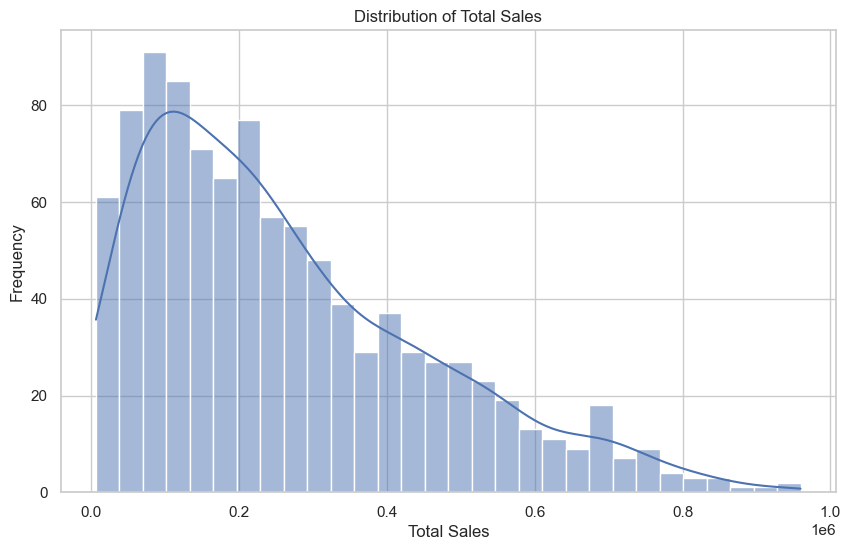

In [33]:
# Univariate Analysis (Total Sales Distribution)
plt.figure(figsize=(10,6))
sns.histplot(df['Total_Sales'], bins=30, kde=True)
plt.title("Distribution of Total Sales")
plt.xlabel("Total Sales")
plt.ylabel("Frequency")
plt.show()

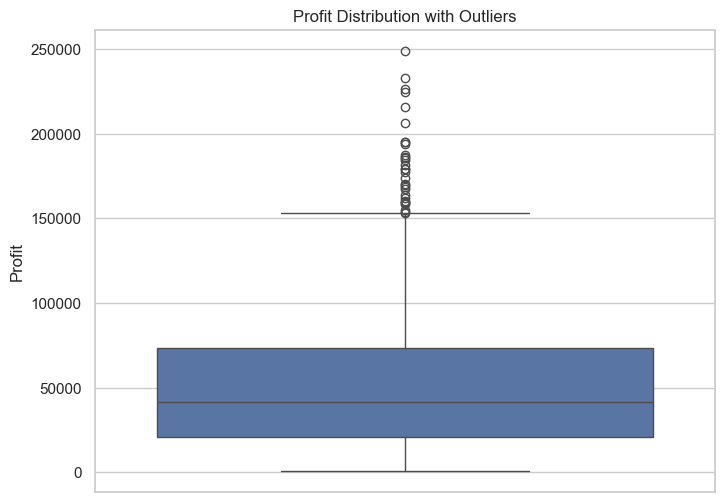

In [19]:
# Profit Distribution
plt.figure(figsize=(8,6))
sns.boxplot(y=df['Profit'])
plt.title("Profit Distribution with Outliers")
plt.ylabel("Profit")
plt.show()

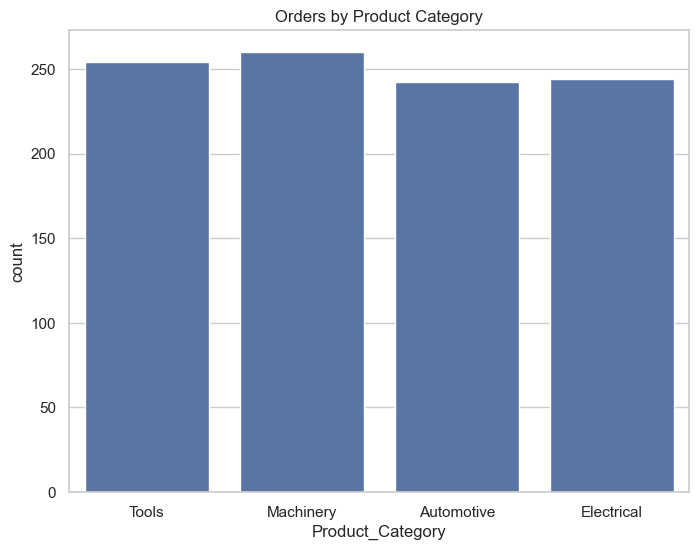

In [34]:
# Product category count
plt.figure(figsize=(8,6))
sns.countplot(x='Product_Category', data=df)
plt.title("Orders by Product Category")
plt.show()

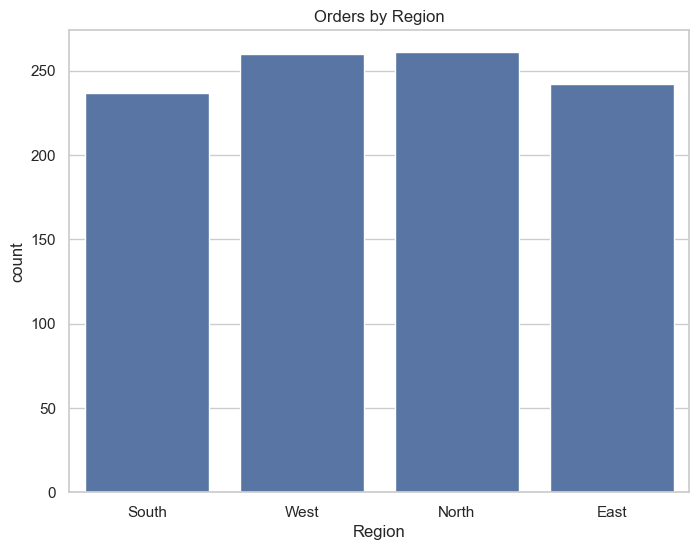

In [21]:
# Region Count
plt.figure(figsize=(8,6))
sns.countplot(x='Region', data=df)
plt.title("Orders by Region")
plt.show()

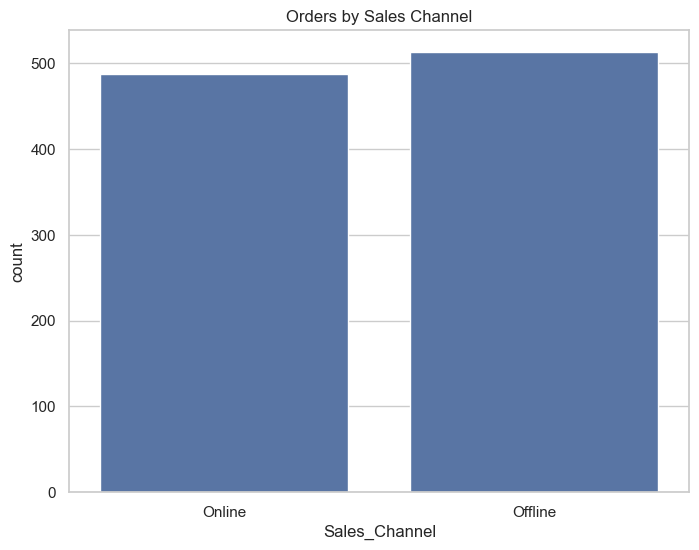

In [22]:
# Sales Channel Count
plt.figure(figsize=(8,6))
sns.countplot(x='Sales_Channel', data=df)
plt.title("Orders by Sales Channel")
plt.show()

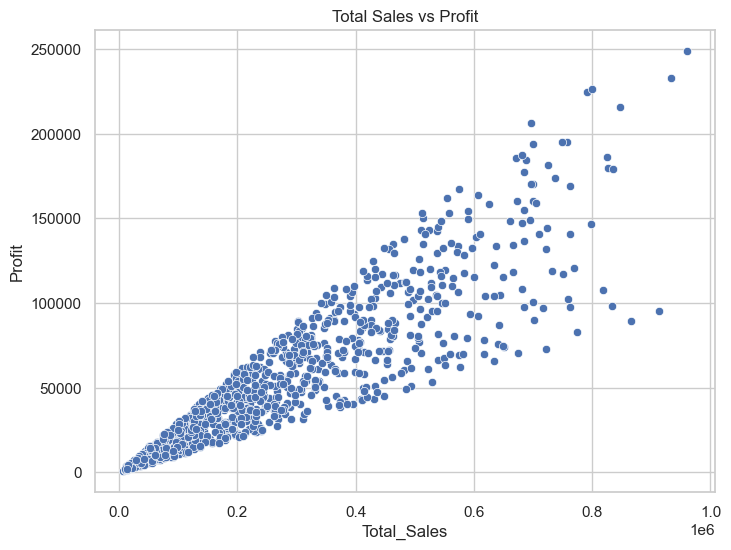

In [23]:
# Bivariate Analysis (Total Sales vs Profit)
plt.figure(figsize=(8,6))
sns.scatterplot(x='Total_Sales', y='Profit', data=df)
plt.title("Total Sales vs Profit")
plt.show()

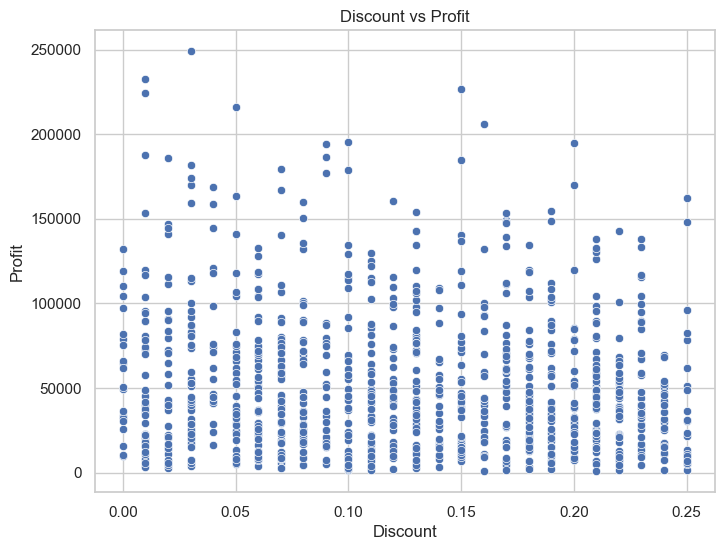

In [24]:
# Discount vs Profit
plt.figure(figsize=(8,6))
sns.scatterplot(x='Discount', y='Profit', data=df)
plt.title("Discount vs Profit")
plt.show()

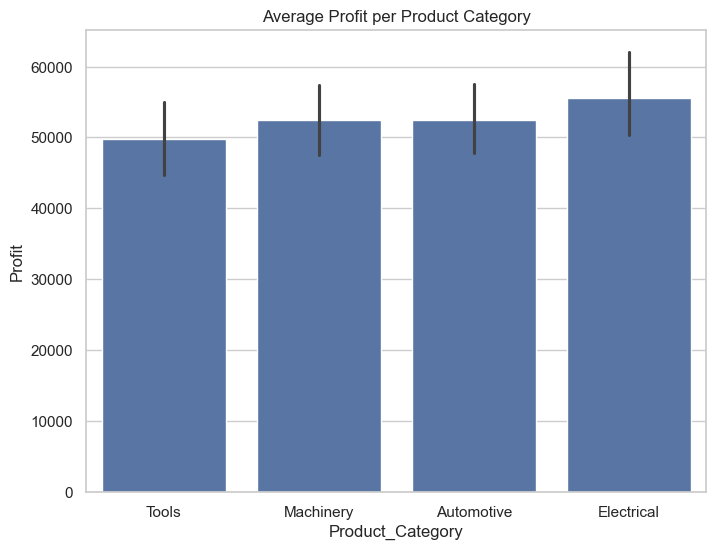

In [25]:
# Product Category vs Profit
plt.figure(figsize=(8,6))
sns.barplot(x='Product_Category', y='Profit', data=df, estimator=np.mean)
plt.title("Average Profit per Product Category")
plt.show()

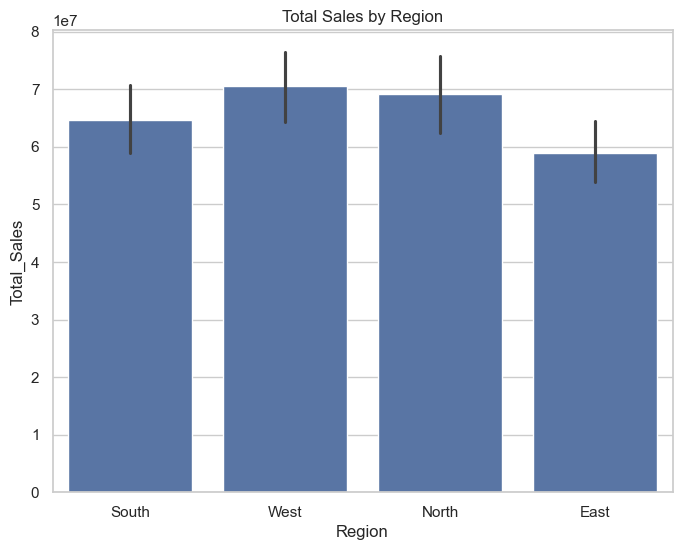

In [26]:
# Region vs Total Sales
plt.figure(figsize=(8,6))
sns.barplot(x='Region', y='Total_Sales', data=df, estimator=np.sum)
plt.title("Total Sales by Region")
plt.show()

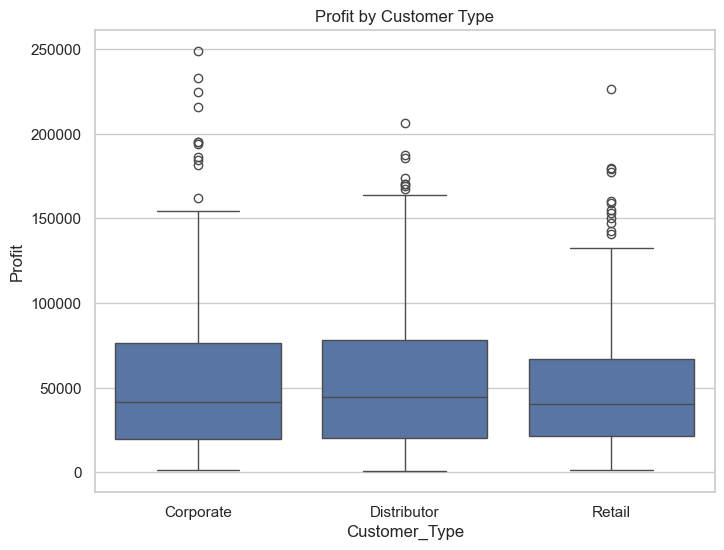

In [27]:
# Customer Type vs Profit
plt.figure(figsize=(8,6))
sns.boxplot(x='Customer_Type', y='Profit', data=df)
plt.title("Profit by Customer Type")
plt.show()

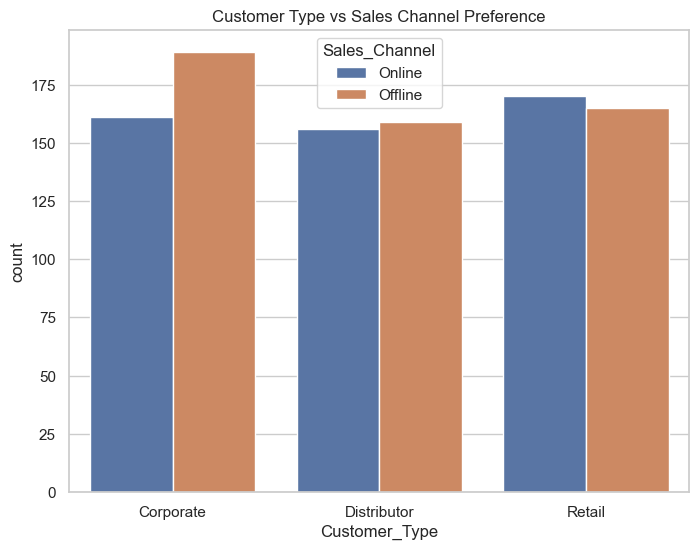

In [28]:
# Sales Channel vs Customer Type
plt.figure(figsize=(8,6))
sns.countplot(x='Customer_Type', hue='Sales_Channel', data=df)
plt.title("Customer Type vs Sales Channel Preference")
plt.show()

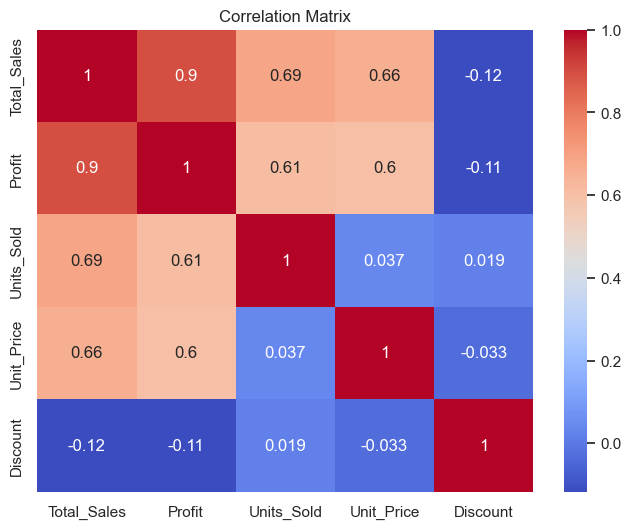

In [29]:
# Correlation Matrix
plt.figure(figsize=(8,6))
corr = df[['Total_Sales', 'Profit', 'Units_Sold', 'Unit_Price', 'Discount']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

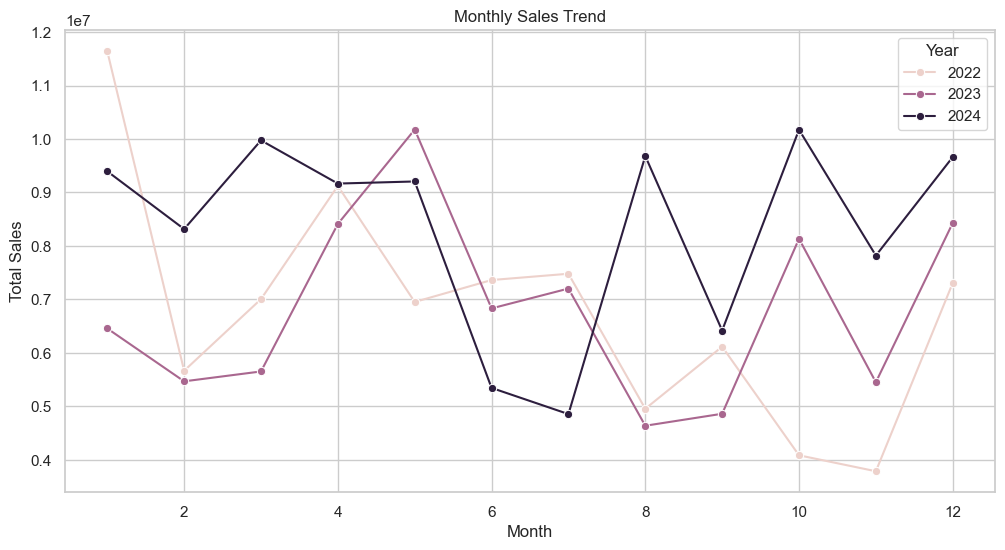

In [30]:
# Trend Analysis (Monthly Sales Trends)
monthly_sales = df.groupby(['Year', 'Month'])['Total_Sales'].sum().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(x='Month', y='Total_Sales', hue='Year', data=monthly_sales, marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()

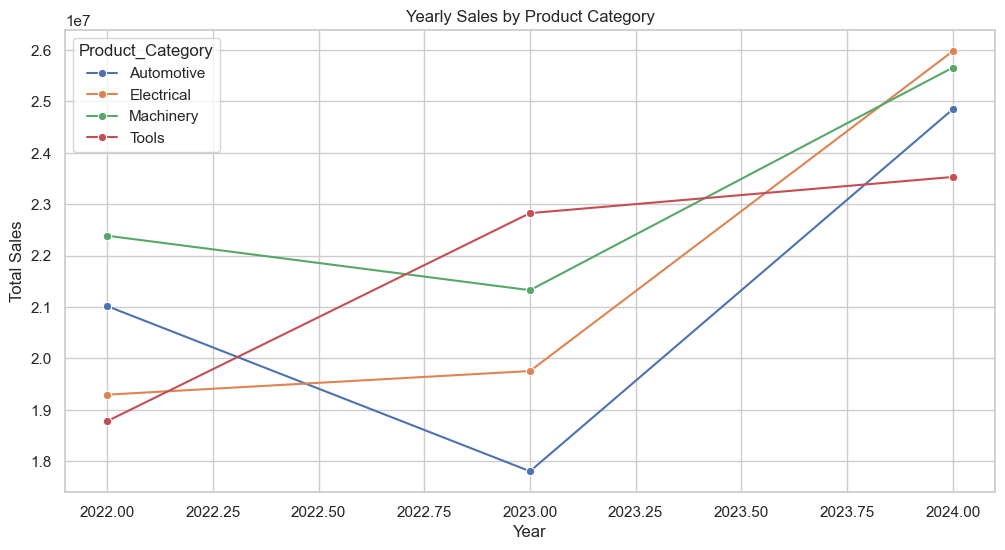

In [31]:
# Trend Analysis (Yearly Category Sales Trend)
category_sales = df.groupby(['Year', 'Product_Category'])['Total_Sales'].sum().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(x='Year', y='Total_Sales', hue='Product_Category', data=category_sales, marker='o')
plt.title("Yearly Sales by Product Category")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.show()